In [2]:
%load_ext tensorboard
import tensorflow as tf
import numpy as np
from livelossplot.tf_keras import PlotLossesCallback

In [3]:
print(tf.__version__)

2.0.0-rc0


In [4]:
dataset = [
    ([0, 1], 1),
    ([1, 1], 0),
    ([1, 0], 1),
    ([0, 0], 0)
]

In [5]:
dataX = [d[0] for d in dataset]
dataY = [d[1] for d in dataset]

In [6]:
inputs = tf.keras.layers.Input(shape=(2, ))
d1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
d2 = tf.keras.layers.Dense(16, activation='relu')(d1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(d2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


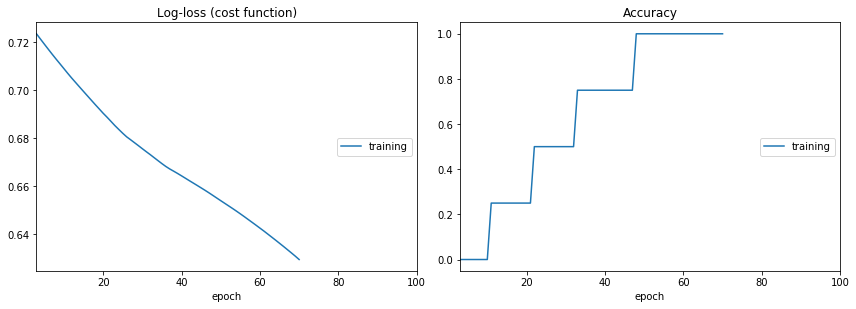

Log-loss (cost function):
training   (min:    0.629, max:    0.728, cur:    0.629)

Accuracy:
training   (min:    0.000, max:    1.000, cur:    1.000)


In [ ]:
model.fit(x=dataX, y=dataY, epochs=100, callbacks=[PlotLossesCallback(), tf.keras.callbacks.TensorBoard(log_dir='logs')], verbose=0)

In [ ]:
model.save('model.h5')
%tensorboard --logdir logs/

In [ ]:
t1 = model.predict([[1, 1]])
t2 = model.predict([[0, 1]])

In [ ]:
np.round(t1)

In [ ]:
np.round(t2)